In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Swiggy.csv')

#### Checking basic information of the dataset

In [3]:
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [5]:
df.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [6]:
df.shape

(8680, 10)

In [7]:
df.columns

Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')

In [8]:
df.dtypes

ID                 int64
Area              object
City              object
Restaurant        object
Price            float64
Avg ratings      float64
Total ratings      int64
Food type         object
Address           object
Delivery time      int64
dtype: object

#### Dropping unnecessary columns from dataset

In [9]:
df.drop(columns = ['Food type', 'Address', 'Total ratings', "ID"], inplace = True)
df.head()

,Area,City,Restaurant,Price,Avg ratings,Delivery time
0,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,59
1,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,56
2,Jogupalya,Bangalore,Kim Lee,650.0,4.4,50
3,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,57
4,Indiranagar,Bangalore,Nh8,350.0,4.0,63


#### Segregation of categorical and numerical columns

In [10]:
cat_cols = df.dtypes == 'object'

In [11]:
cat_cols = cat_cols[cat_cols == True]

In [12]:
cat_cols = list(cat_cols.index)

In [13]:
cat_cols

['Area', 'City', 'Restaurant']

In [14]:
num_cols = df.dtypes != 'object'

In [15]:
num_cols = num_cols[num_cols == True]

In [16]:
num_cols = list(num_cols.index)

In [17]:
num_cols

['Price', 'Avg ratings', 'Delivery time']

#### Finding Missing Values in Dataset

In [18]:
df.isnull().sum() # no missing value found

Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Delivery time    0
dtype: int64

In [38]:
df.loc[df.duplicated() == True]   # no duplicate value found

,Area,City,Restaurant,Price,Avg ratings,Delivery time
375,Anand Nagar,Pune,One Way Paratha,250.0,4.3,73
8079,Kuber Nagar,Ahmedabad,Cake Adda,100.0,2.9,80


#### Finding unique values count per categorical columns

In [20]:
for i in cat_cols:
    print(f'{i} has {df[i].nunique()} values')

Area has 833 values
City has 9 values
Restaurant has 7865 values


In [22]:
df['City'].unique()

array(['Bangalore', 'Hyderabad', 'Mumbai', 'Pune', 'Kolkata', 'Delhi',
       'Chennai', 'Ahmedabad', 'Surat'], dtype=object)

#### Count of area per city

In [23]:
city_area_count = df.groupby('City')[['Area']].count().sort_values(by = 'Area', ascending = False)
city_area_count

,Area
City,
Kolkata,1346
Mumbai,1277
Chennai,1106
Pune,1090
Hyderabad,1075
Bangalore,946
Ahmedabad,717
Delhi,611
Surat,512


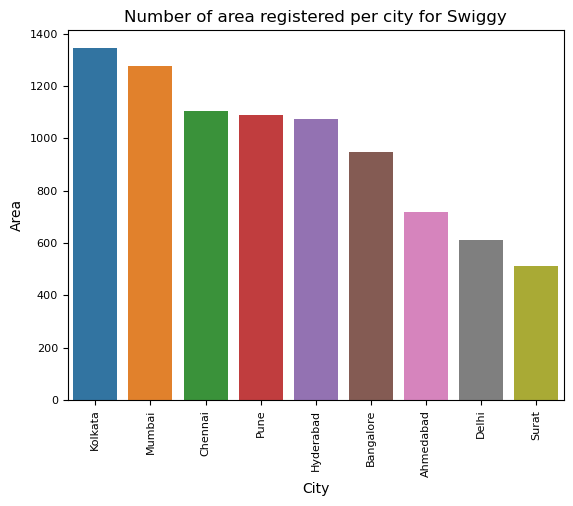

In [24]:
sns.barplot(city_area_count, x = city_area_count.index, y = 'Area')
plt.xticks(rotation = 90, fontsize = 8)
plt.yticks(fontsize = 8)
plt.title('Number of area registered per city for Swiggy')
plt.show()

#### Area vs avg ratings per city

In [26]:
city_area_ratings = df.groupby('City')[['Avg ratings', 'Area']].aggregate({'Avg ratings': 'mean', 'Area':'count'}).sort_values(by = 'Avg ratings',ascending = False)
city_area_ratings

,Avg ratings,Area
City,,
Chennai,3.776311,1106
Bangalore,3.762896,946
Hyderabad,3.701395,1075
Kolkata,3.698811,1346
Mumbai,3.599374,1277
Ahmedabad,3.596513,717
Surat,3.580078,512
Pune,3.550183,1090
Delhi,3.526350,611


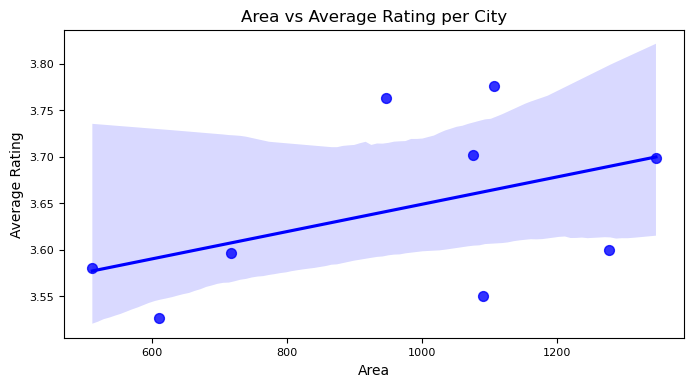

In [62]:
plt.figure(figsize=(8,4))
sns.regplot(x='Area', y='Avg ratings', data=city_area_ratings, scatter=True, color='blue', marker='o', scatter_kws={'s': 50})
plt.title('Area vs Average Rating per City')
plt.xlabel('Area')
plt.ylabel('Average Rating')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

#### Area vs Delivery time per City

In [30]:
city_ratings_time = df.groupby('City')[['Avg ratings', 'Delivery time']].aggregate({'Avg ratings': 'mean', 'Delivery time':'mean'}).sort_values(by = 'Avg ratings',ascending = False)
city_ratings_time['Delivery time'] = city_ratings_time['Delivery time'].round(2)
city_ratings_time

,Avg ratings,Delivery time
City,,
Chennai,3.776311,58.97
Bangalore,3.762896,50.53
Hyderabad,3.701395,49.93
Kolkata,3.698811,67.81
Mumbai,3.599374,48.32
Ahmedabad,3.596513,44.71
Surat,3.580078,48.48
Pune,3.550183,55.85
Delhi,3.526350,50.73


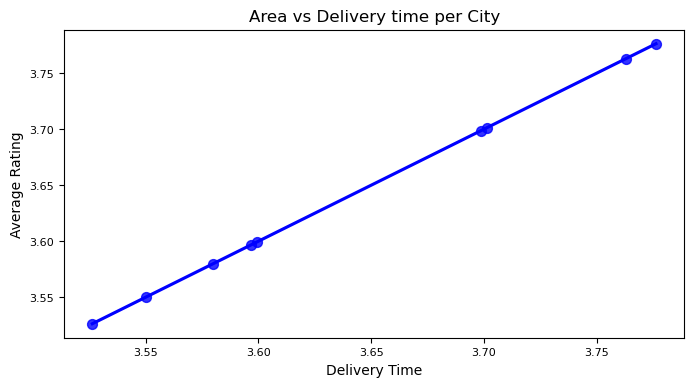

In [61]:
plt.figure(figsize=(8,4))
sns.regplot(x='Avg ratings', y='Avg ratings', data=city_ratings_time, scatter=True, color='blue', marker='o', scatter_kws={'s': 50})
plt.title('Area vs Delivery time per City')
plt.xlabel('Delivery Time')
plt.ylabel('Average Rating')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

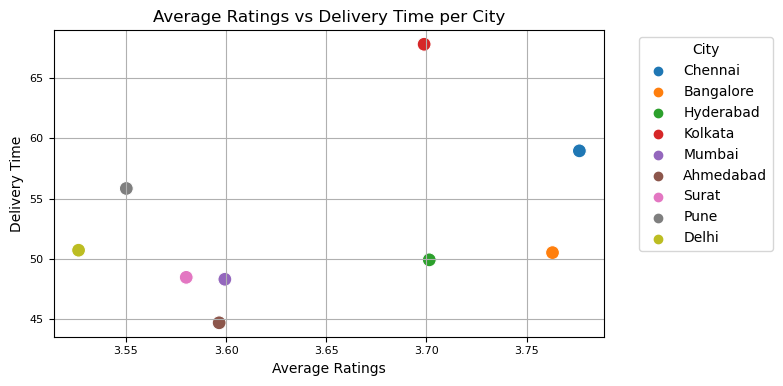

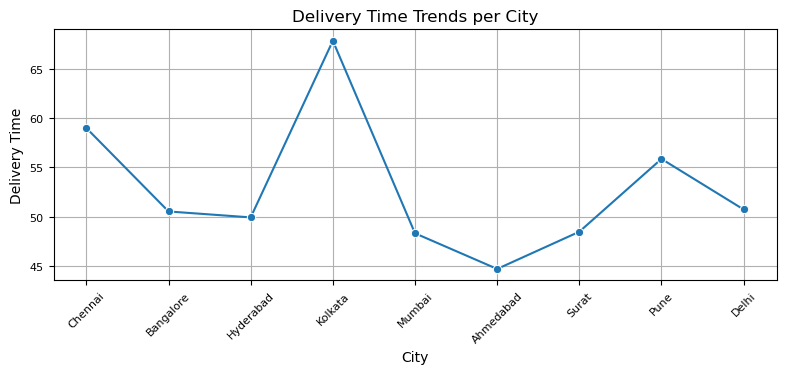

In [59]:
# Scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(data=city_ratings_time, x='Avg ratings', y='Delivery time', hue=city_ratings_time.index, s=100)
plt.title('Average Ratings vs Delivery Time per City')
plt.xlabel('Average Ratings')
plt.ylabel('Delivery Time')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

# Line plot
plt.figure(figsize=(8,4))
sns.lineplot(data=city_ratings_time, x=city_ratings_time.index, y='Delivery time', marker='o')
plt.title('Delivery Time Trends per City')
plt.xlabel('City')
plt.ylabel('Delivery Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

#### Most Favourite Restaurants accross all cities

In [63]:
city_restaurant_ratings = df.groupby(['City', 'Restaurant'])[['Avg ratings']].mean().reset_index()

max_ratings_per_city = city_restaurant_ratings.groupby('City')[['Avg ratings']].max().reset_index()

most_favorite_restaurants = pd.merge(max_ratings_per_city, city_restaurant_ratings, on=['City', 'Avg ratings'], how='left')

pd.DataFrame(most_favorite_restaurants)

,City,Avg ratings,Restaurant
0,Ahmedabad,4.8,Ching Chong Chinese
1,Ahmedabad,4.8,Chup Chaap
2,Ahmedabad,4.8,Natural Ice Cream
3,Ahmedabad,4.8,Wok On Fire - Indo Chinese - Pan Asian
4,Bangalore,5.0,Creams & Bites
5,Bangalore,5.0,Tricky Shakes
6,Chennai,5.0,Afresh
7,Delhi,5.0,Fat Tiger
8,Hyderabad,5.0,Splurge - Thickshakes And Milkshakes
9,Hyderabad,5.0,The Liege Waffles


#### Average order value per city

In [36]:
city_avg_stats_sorted = df.groupby('City')[['Price', 'Delivery time', 'Avg ratings']].mean().round(2).sort_values(by = 'Price', ascending =False)
city_avg_stats_sorted

,Price,Delivery time,Avg ratings
City,,,
Mumbai,393.79,48.32,3.60
Bangalore,382.52,50.53,3.76
Kolkata,362.29,67.81,3.70
Chennai,356.25,58.97,3.78
Pune,353.76,55.85,3.55
Delhi,333.30,50.73,3.53
Ahmedabad,318.13,44.71,3.60
Hyderabad,299.93,49.93,3.70
Surat,270.17,48.48,3.58
